In [88]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem 

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load_df = pd.read_csv(city_data_to_load)
ride_data_to_load_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_city_ride= pd.merge(city_data_to_load_df, ride_data_to_load_df, on="city")

# Display the data table for preview
merged_city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [89]:
suburban_df=merged_city_ride.loc[merged_city_ride['type']== 'Suburban']

In [90]:
rural_df=merged_city_ride.loc[merged_city_ride['type']== 'Rural']

In [91]:
urban_df=merged_city_ride.loc[merged_city_ride['type']== 'Urban']


In [92]:
urban_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [93]:
total_rides_suburban = suburban_df.groupby(["city"]).count()["ride_id"]

In [94]:
total_rides_rural = rural_df.groupby(["city"]).count()["ride_id"]

In [95]:
total_rides_urban = urban_df.groupby(["city"]).count()["ride_id"]

In [96]:
total_rides_urban

city
Amandaburgh             18
Barajasview             22
Carriemouth             27
Christopherfurt         27
Deanville               19
East Kaylahaven         29
Erikaland               12
Grahamburgh             25
Huntermouth             24
Hurleymouth             28
Jerryton                25
Johnton                 21
Joneschester            25
Justinberg              30
Karenberg               17
Karenside               28
Lake Danielberg         26
Lake Jonathanshire      24
Lake Scottton           24
Leahton                 21
Liumouth                33
Loganberg               28
Martinezhaven           24
New Jacobville          18
New Kimberlyborough     30
New Paulton             19
New Paulville           22
North Barbara           22
North Jasmine           30
North Jason             35
                        ..
Port Johnbury           22
Port Samanthamouth      25
Raymondhaven            25
Reynoldsfurt            19
Richardfort             28
Roberthaven            

In [97]:
avg_fare_suburban = suburban_df.groupby(["city"]).mean()["fare"]

In [98]:
avg_fare_rural = rural_df.groupby(["city"]).mean()["fare"]

In [99]:
avg_fare_urban = urban_df.groupby(["city"]).mean()["fare"]

In [100]:
round(avg_fare_suburban, 2)

city
Barronchester         36.42
Bethanyland           32.96
Brandonfort           35.44
Colemanland           30.89
Davidfurt             32.00
East Aaronbury        25.66
East Danielview       31.56
East Kentstad         29.82
East Marymouth        30.84
Grayville             27.76
Josephside            32.86
Lake Ann              30.89
Lake Omar             28.07
Lake Robertside       31.26
Lake Scott            31.89
Lewishaven            25.24
Lewisland             34.61
Mezachester           30.76
Myersshire            30.20
New Olivia            34.05
New Raymond           27.96
New Shannonberg       28.38
Nicolechester         30.91
North Jeffrey         29.24
North Richardhaven    24.70
North Timothy         31.26
Port Shane            31.08
Rodriguezview         30.75
Sotoville             31.98
South Brenda          33.96
South Teresa          31.22
Veronicaberg          32.83
Victoriaport          27.78
West Hannah           29.55
West Kimmouth         29.87
Williamsonville

In [101]:
round(avg_fare_rural, 2)

city
Bradshawfurt         40.06
Garzaport            24.12
Harringtonfort       33.47
Jessicaport          36.01
Lake Jamie           34.36
Lake Latoyabury      26.06
Michaelberg          35.00
New Ryantown         43.28
Newtonview           36.75
North Holly          29.13
North Jaime          30.80
Penaborough          35.25
Randallchester       29.74
South Jennifer       35.26
South Marychester    41.87
South Saramouth      36.16
Taylorhaven          42.26
West Heather         33.89
Name: fare, dtype: float64

In [102]:
round(avg_fare_urban, 2)

city
Amandaburgh             24.64
Barajasview             25.33
Carriemouth             28.31
Christopherfurt         24.50
Deanville               25.84
East Kaylahaven         23.76
Erikaland               24.91
Grahamburgh             25.22
Huntermouth             28.99
Hurleymouth             25.89
Jerryton                25.65
Johnton                 26.79
Joneschester            22.29
Justinberg              23.69
Karenberg               26.34
Karenside               27.45
Lake Danielberg         24.84
Lake Jonathanshire      23.43
Lake Scottton           23.81
Leahton                 21.24
Liumouth                26.15
Loganberg               25.29
Martinezhaven           22.65
New Jacobville          26.77
New Kimberlyborough     22.59
New Paulton             27.82
New Paulville           21.68
North Barbara           23.49
North Jasmine           25.21
North Jason             22.74
                        ...  
Port Johnbury           23.01
Port Samanthamouth      25.64
Raymo

In [103]:
driver_count_suburban = suburban_df.groupby(["city"])["driver_count"].value_counts()

In [104]:
driver_count_rural = rural_df.groupby(["city"])["driver_count"].value_counts()

In [105]:
driver_count_urban = urban_df.groupby(["city"])["driver_count"].value_counts()

In [106]:
driver_count_urban

city                  driver_count
Amandaburgh           12              18
Barajasview           26              22
Carriemouth           52              27
Christopherfurt       41              27
Deanville             49              19
East Kaylahaven       65              29
Erikaland             37              12
Grahamburgh           61              25
Huntermouth           37              24
Hurleymouth           36              28
Jerryton              64              25
Johnton               27              21
Joneschester          39              25
Justinberg            39              30
Karenberg             22              17
Karenside             5               28
Lake Danielberg       19              26
Lake Jonathanshire    5               24
Lake Scottton         58              24
Leahton               17              21
Liumouth              69              33
Loganberg             23              28
Martinezhaven         25              24
New Jacobville        

In [107]:
rural_df=merged_city_ride.loc[merged_city_ride['type']== 'Rural']

In [108]:
suburban_df=merged_city_ride.loc[merged_city_ride['type']== 'Suburban']

In [109]:
urban_df = merged_city_ride.loc[merged_city_ride['type']== 'Urban']

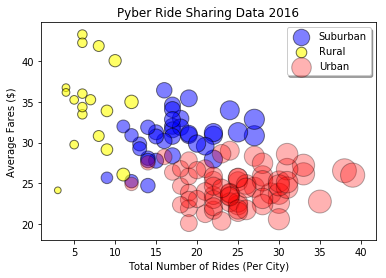

In [110]:
plt.scatter(total_rides_suburban, avg_fare_suburban, s=driver_count_suburban * 15, marker="o", facecolors="blue", edgecolors="black",alpha=.5, label="Suburban")
plt.scatter(total_rides_rural, avg_fare_rural, s=driver_count_rural * 15, marker="o", facecolors="yellow", edgecolors="black",alpha=.6, label="Rural")
plt.scatter(total_rides_urban, avg_fare_urban, s=driver_count_urban * 15, marker="o", facecolors="red", edgecolors="black",alpha=.3, label="Urban")

plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.legend(loc="best", shadow="true")
plt.show()


## Bubble Plot of Ride Sharing Data

In [111]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [112]:
# Show plot
plt.show()

## Total Fares by City Type

In [113]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [114]:
# Show Figure


In [115]:
suburban_fares_sum = suburban_df["fare"].sum()

In [116]:
rural_fares_sum = rural_df["fare"].sum()

In [117]:
urban_fares_sum = urban_df["fare"].sum()

In [118]:
urban_fares_sum

39854.380000000005

In [119]:
city_types = ["Suburban", "Rural", "Urban"]
total_fares = [suburban_fares_sum, rural_fares_sum, urban_fares_sum]
colors = ["blue", "yellow", "red"]
explode = (0,0,0.1)

<function matplotlib.pyplot.show(*args, **kw)>

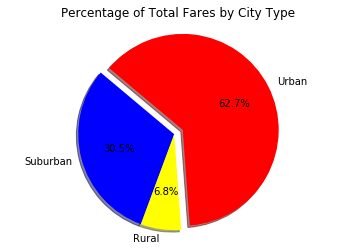

In [120]:
plt.pie(total_fares, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Percentage of Total Fares by City Type")
plt.show

## Total Rides by City Type

In [121]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [122]:
# Show Figure

In [123]:
urban_rides = urban_df["ride_id"].count()

In [124]:
suburban_rides = suburban_df["ride_id"].count()

In [125]:
rural_rides = rural_df["ride_id"].count()

In [126]:
city_types = ["Suburban", "Rural", "Urban"]
total_rides = [suburban_rides, rural_rides, urban_rides]
colors = ["blue", "yellow", "red"]
explode = (0.1,0.05,0)

<function matplotlib.pyplot.show(*args, **kw)>

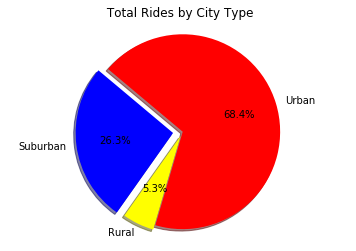

In [127]:
plt.pie(total_rides, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title(" Total Rides by City Type")
plt.show

## Total Drivers by City Type

In [128]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [129]:
# Show Figure


In [130]:
suburban_drivers = suburban_df["driver_count"].sum()

In [131]:
rural_drivers = rural_df["driver_count"].sum()

In [132]:
urban_drivers = urban_df["driver_count"].sum()

In [133]:
city_types = ["Suburban", "Rural", "Urban"]
total_drivers = [suburban_drivers, rural_drivers, urban_drivers]
colors = ["blue", "yellow", "red"]
explode = (0.05,0.1,.05)

<function matplotlib.pyplot.show(*args, **kw)>

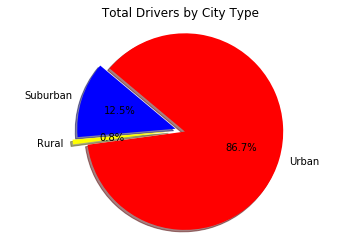

In [134]:
plt.pie(total_drivers, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title(" Total Drivers by City Type")
plt.show